In [25]:
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [96]:
num_classes = 10

(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [62]:
# On mets les datas en 32 bits et normalisation 255 des couleurs
#train_X = train_X.astype("float32") / 255
#test_X = test_X.astype("float32") / 255


In [97]:
# Avoir shape (28, 28, 1)
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)



print("Train x shape : ", train_X.shape)

Train x shape :  (60000, 28, 28, 1)


In [98]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [99]:
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [ ]:
# Plot des images
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [117]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

#train_y = keras.utils.to_categorical(train_y, num_classes)
#test_y = keras.utils.to_categorical(test_y, num_classes)

train_X = train_X.reshape(60000, 784).astype("float32") / 255
test_X = test_X.reshape(10000, 784).astype("float32") / 255
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
train_y

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [118]:
input_shape = (784,)
inputs = keras.Input(shape=input_shape)
print(inputs.shape)
print(inputs.dtype)


(None, 784)
<dtype: 'float32'>


In [119]:
dense = layers.Dense(64, activation = 'relu')
x = dense(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [120]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [114]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


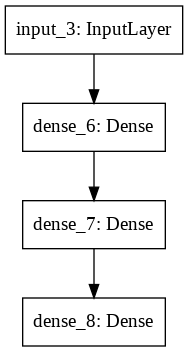

In [106]:
keras.utils.plot_model(model, "first_plot.png")

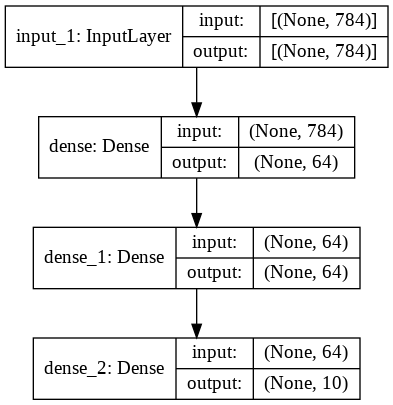

In [81]:
keras.utils.plot_model(model, "first_plot.png", show_shapes = True)


In [121]:
# SpartseCategorical remplace les 2 lignes de category
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.RMSprop(),
    metrics = ["accuracy"]
)

In [122]:
history = model.fit(train_X, train_y, batch_size = 64, epochs = 5, validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3603 - accuracy: 0.8964 - val_loss: 0.1863 - val_accuracy: 0.9459
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1703 - accuracy: 0.9495 - val_loss: 0.1442 - val_accuracy: 0.9582
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1238 - accuracy: 0.9634 - val_loss: 0.1252 - val_accuracy: 0.9627
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0979 - accuracy: 0.9705 - val_loss: 0.1277 - val_accuracy: 0.9645
Epoch 5/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.1085 - val_accuracy: 0.9672


In [125]:
_, acc = model.evaluate(test_X, test_y, verbose = 1)
print(f"{acc * 100}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9671
96.71000242233276


In [127]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


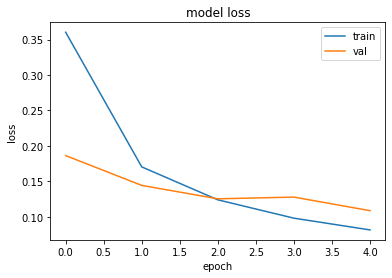

In [132]:
pyplot.plot(history.history["loss"])
pyplot.plot(history.history["val_loss"])
pyplot.title("model loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(["train", "val"], loc = 'best')
pyplot.show()

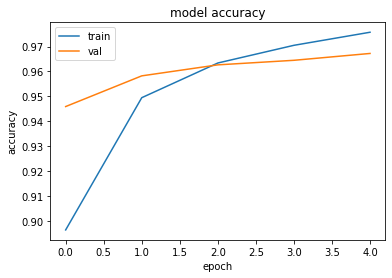

In [133]:
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["val_accuracy"])
pyplot.title("model accuracy")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(["train", "val"], loc = 'best')
pyplot.show()